## **Model 14: Model 11 (Adam + batch size 16) + Batch Normalization**

**Preprocessing with batch size = 16**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

IMG_SIZE = (128, 128)
BATCH_SIZE = 16
SEED = 42

train_dir = "datasets/Training"
test_dir  = "datasets/Testing"

# Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Validation split
val_size = int(0.2 * len(train_ds))
val_ds = train_ds.take(val_size)
train_ds = train_ds.skip(val_size)

# Normalize
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x,y: (normalization_layer(x), y))
val_ds   = val_ds.map(lambda x,y: (normalization_layer(x), y))
test_ds  = test_ds.map(lambda x,y: (normalization_layer(x), y))

# Prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)
test_ds  = test_ds.cache().prefetch(AUTOTUNE)


Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [2]:
def build_medium_cnn_leakyrelu_bn(input_shape=(128,128,3), num_classes=4):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(128, (3,3), padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(128),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.1),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Build Model 14
model14 = build_medium_cnn_leakyrelu_bn()
model14.summary()

d:\Python11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Python11\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289,604 (16.36 MB)

 Trainable params: 4,288,900 (16.36 MB)

 Non-trainable params: 704 (2.75 KB)

**Callbacks**

In [3]:
callbacks = [
    EarlyStopping(
        monitor='val_loss', 
        patience=5, 
        min_delta=1e-3, 
        restore_best_weights=True, 
        verbose=1
    ),
    ModelCheckpoint(
        filepath='models/model14_best.h5', 
        monitor='val_loss', 
        save_best_only=True, 
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.5, 
        patience=3, 
        min_lr=1e-6, 
        verbose=1
    )
]

**Compile**

In [4]:
model14.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

**Train**

In [5]:
history14 = model14.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.7462 - loss: 0.7037
Epoch 1: val_loss improved from None to 2.48285, saving model to models/model14_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 59s 196ms/step - accuracy: 0.8136 - loss: 0.5028 - val_accuracy: 0.4560 - val_loss: 2.4829 - learning_rate: 0.0010
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9053 - loss: 0.2774
Epoch 2: val_loss improved from 2.48285 to 0.37594, saving model to models/model14_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 55s 191ms/step - accuracy: 0.9178 - loss: 0.2443 - val_accuracy: 0.8776 - val_loss: 0.3759 - learning_rate: 0.0010
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9568 - loss: 0.1442
Epoch 3: val_loss did not improve from 0.37594
286/286 ━━━━━━━━━━━━━━━━━━━━ 55s 191ms/step - accuracy: 0.9624 - loss: 0.1228 - val_accuracy: 0.7746 - val_loss: 0.8729 - learning_rate: 0.0010
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9828 - loss: 0.0724
Epoch 4: val_loss did not improve from 0.37594
286/286 ━━━━━━━━━━━━━━━━━━━━ 55s 191ms/step - accuracy: 0.9838 - loss: 0.0683 - val_accuracy: 0.7271 - val_loss: 1.2487 - learning_rate: 0.0010
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.9908 - loss: 0.0455
Epoch 5: val_loss improved from 0.37594 to 0.27546, saving model to models/model14_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 55s 193ms/step - accuracy: 0.9910 - loss: 0.0404 - val_accuracy: 0.9102 - val_loss: 0.2755 - learning_rate: 0.0010
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9913 - loss: 0.0306
Epoch 6: val_loss did not improve from 0.27546
286/286 ━━━━━━━━━━━━━━━━━━━━ 55s 192ms/step - accuracy: 0.9904 - loss: 0.0330 - val_accuracy: 0.8627 - val_loss: 0.5163 - learning_rate: 0.0010
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9934 - loss: 0.0269
Epoch 7: val_loss did not improve from 0.27546
286/286 ━━━━━━━━━━━━━━━━━━━━ 55s 192ms/step - accuracy: 0.9958 - loss: 0.0210 - val_accuracy: 0.8996 - val_loss: 0.3318 - learning_rate: 0.0010
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.9941 - loss: 0.0217
Epoch 8: val_loss improved from 0.27546 to 0.22503, saving model to models/model14_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 55s 193ms/step - accuracy: 0.9928 - loss: 0.0245 - val_accuracy: 0.9410 - val_loss: 0.2250 - learning_rate: 0.0010
Epoch 9/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.9986 - loss: 0.0096
Epoch 9: val_loss did not improve from 0.22503
286/286 ━━━━━━━━━━━━━━━━━━━━ 54s 189ms/step - accuracy: 0.9989 - loss: 0.0085 - val_accuracy: 0.9278 - val_loss: 0.2620 - learning_rate: 0.0010
Epoch 10/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9963 - loss: 0.0157
Epoch 10: val_loss improved from 0.22503 to 0.18287, saving model to models/model14_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 55s 192ms/step - accuracy: 0.9965 - loss: 0.0159 - val_accuracy: 0.9481 - val_loss: 0.1829 - learning_rate: 0.0010
Epoch 11/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.9996 - loss: 0.0039
Epoch 11: val_loss did not improve from 0.18287
286/286 ━━━━━━━━━━━━━━━━━━━━ 57s 198ms/step - accuracy: 0.9978 - loss: 0.0062 - val_accuracy: 0.8776 - val_loss: 0.5355 - learning_rate: 0.0010
Epoch 12/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.9914 - loss: 0.0290
Epoch 12: val_loss did not improve from 0.18287
286/286 ━━━━━━━━━━━━━━━━━━━━ 56s 194ms/step - accuracy: 0.9823 - loss: 0.0530 - val_accuracy: 0.7843 - val_loss: 0.9400 - learning_rate: 0.0010
Epoch 13/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9892 - loss: 0.0319
Epoch 13: val_loss did not improve from 0.18287

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
286/286 ━━━━━━━━━━━━━━━━━━━━ 55s 191ms/step - accuracy: 0.9932 - loss: 0.0236 -

**Load best model**

In [6]:
best_model14 = tf.keras.models.load_model('models/model14_best.h5')

**Evaluate**

In [7]:
# Evaluate on test set
test_loss, test_acc = best_model14.evaluate(test_ds)
print(f"Model 14 (BatchNorm) - Test accuracy: {test_acc:.4f}")
print(f"Model 14 (BatchNorm) - Test loss: {test_loss:.4f}")

# Get final training & validation metrics
final_train_acc = history14.history['accuracy'][-1]
final_train_loss = history14.history['loss'][-1]
final_val_acc   = history14.history['val_accuracy'][-1]
final_val_loss  = history14.history['val_loss'][-1]

print(f"Model 14 (BatchNorm) - Final training accuracy: {final_train_acc:.4f}")
print(f"Model 14 (BatchNorm) - Final training loss: {final_train_loss:.4f}")
print(f"Model 14 (BatchNorm) - Final validation accuracy: {final_val_acc:.4f}")
print(f"Model 14 (BatchNorm) - Final validation loss: {final_val_loss:.4f}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9535 - loss: 0.2145
Model 14 (BatchNorm) - Test accuracy: 0.9535
Model 14 (BatchNorm) - Test loss: 0.2145
Model 14 (BatchNorm) - Final training accuracy: 1.0000
Model 14 (BatchNorm) - Final training loss: 0.0012
Model 14 (BatchNorm) - Final validation accuracy: 0.9533
Model 14 (BatchNorm) - Final validation loss: 0.2052


**Loss curve plotting**

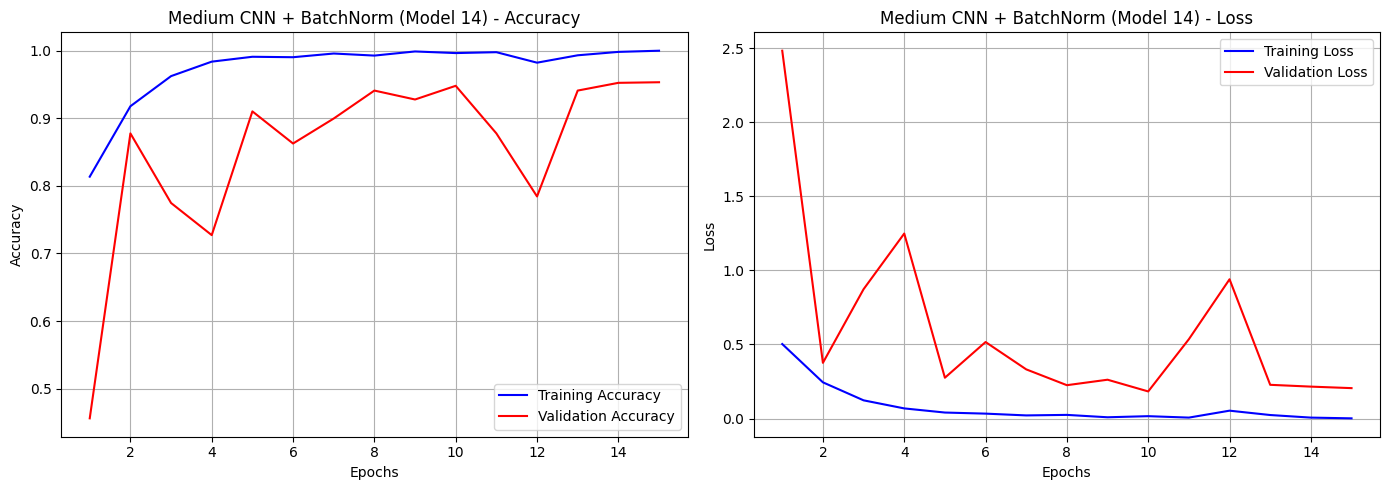

In [8]:
from plot import plot_training_curves

plot_training_curves(history14, model_name="Medium CNN + BatchNorm (Model 14)")

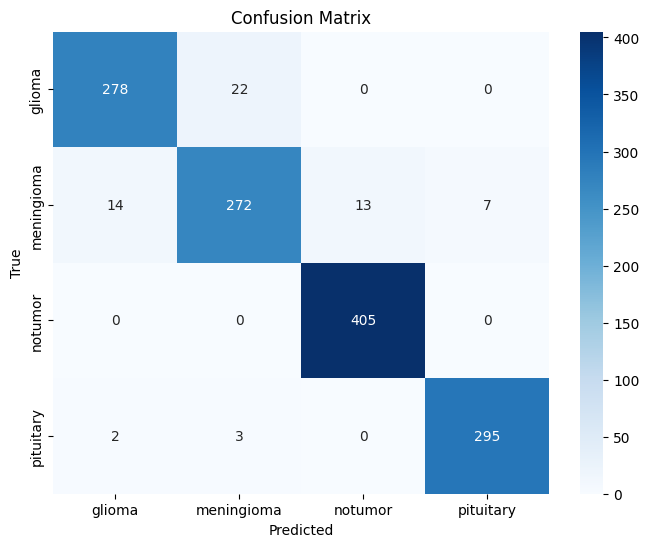


Classification Report:

              precision    recall  f1-score   support

      glioma       0.95      0.93      0.94       300
  meningioma       0.92      0.89      0.90       306
     notumor       0.97      1.00      0.98       405
   pituitary       0.98      0.98      0.98       300

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.95      0.95      0.95      1311



In [2]:
from plot_utils import (
    plot_training_curves,
    evaluate_model_with_confusion,
    plot_confusion_matrix_from_dataset
)

class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Confusion matrix with in-memory model
# evaluate_model_with_confusion(model19, test_ds, title="Confusion Matrix (Test)")

# Confusion matrix from saved model
plot_confusion_matrix_from_dataset("models/model14_best.h5", test_ds, class_names)
